In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
import plotly.offline as plot
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('C:/Users/ujjwa/Desktop/TSLA.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2843 non-null   object 
 1   Open       2843 non-null   float64
 2   High       2843 non-null   float64
 3   Low        2843 non-null   float64
 4   Close      2843 non-null   float64
 5   Adj Close  2843 non-null   float64
 6   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.6+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
print(f'Dataframe conatins stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days} days')

Dataframe conatins stock prices between 2010-07-01 00:00:00 2021-10-14 00:00:00
Total days = 4123 days


In [6]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2843,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2.843000e+03
mean,2016-02-22 06:14:48.920154624,105.868475,108.031370,103.555733,105.924597,105.924597,3.141524e+07
min,2010-07-01 00:00:00,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,2013-04-29 12:00:00,10.698000,11.026000,10.420000,10.727000,10.727000,1.251050e+07
50%,2016-02-24 00:00:00,45.874001,46.493999,45.102001,45.916000,45.916000,2.481500e+07
75%,2018-12-18 12:00:00,65.021000,66.251999,64.015001,65.275002,65.275002,4.012025e+07
max,2021-10-14 00:00:00,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08
std,NaN,188.738974,192.483055,184.638617,188.836358,188.836358,2.841880e+07


<Axes: >

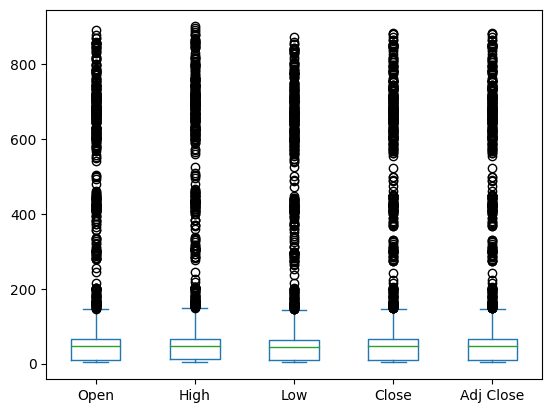

In [7]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
# Setting the Layout for our plot
layout = go.Layout(
        title='stock prices of tesla',
        xaxis=dict(
              title='Date',
              titlefont=dict(
                       family='Courier New, monospace',
                       size=18,
                       color='#7f7f7f'
              )
        ),
          yaxis=dict(
              title='Price',
              titlefont=dict(
                       family='Courier New, monospace',
                       size=18,
                       color='#7f7f7f'
              )
        )
)
df_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=df_data, layout=layout)

In [9]:
iplot(plot)

In [10]:
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
X = np.array(df.index).reshape(-1,1)
Y = df['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

In [12]:
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
print(lm.score(X_test,Y_test))

0.4131373098429034


In [15]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
df_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=df_data, layout=layout)

In [16]:
iplot(plot2)

In [17]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust (10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''

print(scores)



Metric           Train                Test        
r2_score  0.41044228972678165	0.4131373098429034
MSE       21136.840352516032	20635.915166425984

